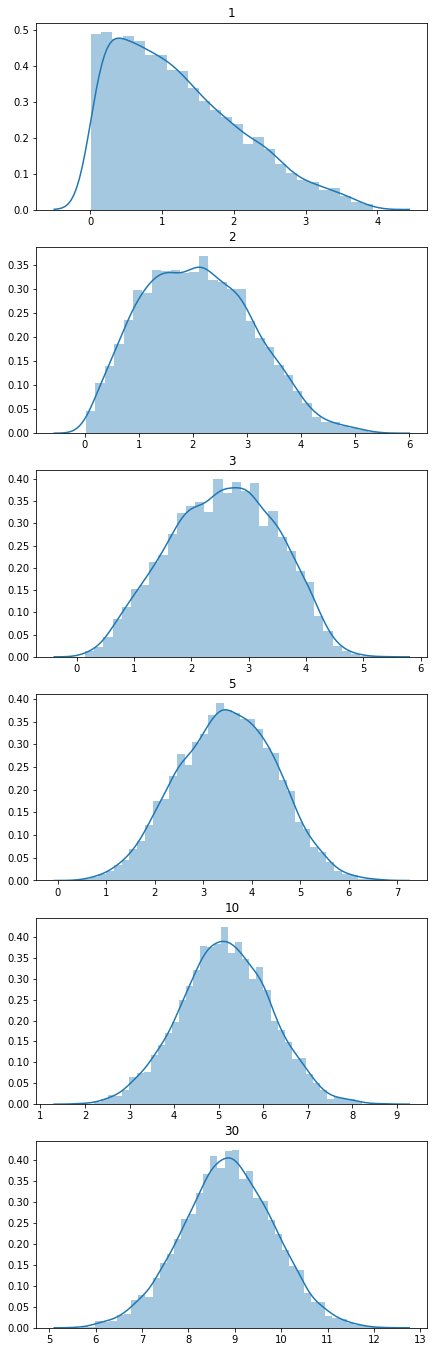

In [4]:
# Test
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist

ks = [1,2,3,5,10,30]
fig, axes = plt.subplots(len(ks),figsize = (7,4*len(ks)))
for i,k in enumerate(ks):
    p1 = np.random.uniform(0,4,(100,k))
    sns.distplot(pdist(p1,'euclidean'),ax= axes[i])
    axes[i].set_title(k)